Descripcion y preprocesamiento de datos 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.model_selection import train_test_split

In [2]:
path_file = 'Petrel int KI facies.xlsx'
df = pd.read_excel(path_file)
df

,DEPT,TVD,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL,LITOF
0,6016.0936,5486.7813,9.6313,61.9430,62.8628,102.9140,0.0498,2.6503,45.7279,3.123200,0.0429,0.0244,0.0000,0.0185,0.5885,0.0507,0.8950,0.0,11
1,6016.2460,5486.8746,9.6579,61.3772,61.3846,105.0989,0.0519,2.6599,26.6232,1.100200,0.0438,0.0144,0.0000,0.0295,0.6978,0.0509,0.9050,0.0,11
2,6016.3984,5486.9678,9.9275,61.1973,61.3653,105.7249,0.0554,2.6615,22.2635,1.119500,0.0465,0.0127,0.0000,0.0338,0.7349,0.0527,0.9008,0.0,11
3,6016.5508,5487.0611,10.3623,59.9278,60.4467,106.4728,0.0662,2.6585,41.9459,6.025500,0.0551,0.0287,0.0000,0.0264,0.4344,0.0559,0.8890,0.0,11
4,6016.7032,5487.1544,10.4662,57.8280,56.4494,106.6974,0.0717,2.6542,51.7506,13.908400,0.0597,0.0385,0.0000,0.0213,0.3562,0.0567,0.8835,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,6328.2088,5677.7770,3.0102,52.1919,52.2783,98.2750,0.0579,2.6687,320.1867,336.600311,0.0503,0.0234,0.0268,0.0000,0.1576,0.0234,0.9264,0.0,11
2049,6328.3612,5677.8703,2.5633,52.5088,52.5705,98.2713,0.0584,2.6731,330.0566,363.979706,0.0505,0.0224,0.0281,0.0000,0.1566,0.0221,0.9275,0.0,11
2050,6328.5136,5677.9635,2.9604,52.2195,51.9629,98.2559,0.0591,2.6724,328.0584,367.523987,0.0510,0.0229,0.0281,0.0000,0.1537,0.0232,0.9258,0.0,11
2051,6328.6660,5678.0568,3.3149,52.6241,52.5145,98.2698,0.0613,2.6619,309.9524,360.936188,0.0535,0.0262,0.0273,0.0000,0.1517,0.0243,0.9223,0.0,11


In [3]:
df["LITOF"].value_counts()

LITOF
11    1621
12     339
9       60
10      27
13       6
Name: count, dtype: int64

Generar la descripcion estadistica del conjunto de entrenamiento. 

In [4]:
df.describe()

,DEPT,TVD,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL,LITOF
count,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000
mean,6172.456000,5582.465677,7.818534,56.063259,56.061047,103.928434,0.052455,2.645526,136.190402,174.836588,0.046205,0.032819,0.008958,0.004429,0.353480,0.044757,0.904248,0.004635,11.099367
std,90.341862,55.283774,3.596512,3.575197,3.622153,8.183122,0.033296,0.065256,103.066691,462.653421,0.031988,0.028398,0.008898,0.012933,0.166777,0.018156,0.042995,0.017655,0.545105
min,6016.093600,5486.781300,-1.101100,49.301000,49.104000,94.485200,0.020100,2.343200,4.097700,0.203300,0.014400,0.000000,0.000000,0.000000,0.001000,0.012700,0.623100,0.000000,9.000000
25%,6094.274800,5534.623500,4.980900,53.980100,53.968100,99.478000,0.033800,2.632500,72.155500,8.713200,0.027400,0.017600,0.000000,0.000000,0.214000,0.029600,0.901200,0.000000,11.000000
50%,6172.456000,5582.465700,8.716000,54.989300,54.982300,101.254500,0.040500,2.665900,107.660000,56.832901,0.034900,0.025900,0.006600,0.000000,0.361400,0.045400,0.917300,0.000000,11.000000
75%,6250.637200,5630.307900,10.208400,56.649700,56.605000,104.200000,0.057100,2.684100,158.064000,123.736099,0.052000,0.038300,0.016000,0.003900,0.474900,0.054700,0.927200,0.000000,11.000000
max,6328.818400,5678.150000,32.092400,73.935600,73.958200,148.297500,0.218100,2.771200,845.552500,3734.715088,0.199300,0.181800,0.047400,0.169800,1.000000,0.115300,0.959500,0.244900,13.000000


In [5]:
df.dtypes

DEPT       float64
TVD        float64
CGR_S_1    float64
DT         float64
DTCO_DS    float64
DTSM_DS    float64
NPHI       float64
RHOB       float64
RP         float64
K          float64
PHIE       float64
PHID       float64
PHIF       float64
PHIM       float64
SW         float64
VOLARC     float64
VOLCAL     float64
VOLDOL     float64
LITOF        int64
dtype: object

In [6]:
df

,DEPT,TVD,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL,LITOF
0,6016.0936,5486.7813,9.6313,61.9430,62.8628,102.9140,0.0498,2.6503,45.7279,3.123200,0.0429,0.0244,0.0000,0.0185,0.5885,0.0507,0.8950,0.0,11
1,6016.2460,5486.8746,9.6579,61.3772,61.3846,105.0989,0.0519,2.6599,26.6232,1.100200,0.0438,0.0144,0.0000,0.0295,0.6978,0.0509,0.9050,0.0,11
2,6016.3984,5486.9678,9.9275,61.1973,61.3653,105.7249,0.0554,2.6615,22.2635,1.119500,0.0465,0.0127,0.0000,0.0338,0.7349,0.0527,0.9008,0.0,11
3,6016.5508,5487.0611,10.3623,59.9278,60.4467,106.4728,0.0662,2.6585,41.9459,6.025500,0.0551,0.0287,0.0000,0.0264,0.4344,0.0559,0.8890,0.0,11
4,6016.7032,5487.1544,10.4662,57.8280,56.4494,106.6974,0.0717,2.6542,51.7506,13.908400,0.0597,0.0385,0.0000,0.0213,0.3562,0.0567,0.8835,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,6328.2088,5677.7770,3.0102,52.1919,52.2783,98.2750,0.0579,2.6687,320.1867,336.600311,0.0503,0.0234,0.0268,0.0000,0.1576,0.0234,0.9264,0.0,11
2049,6328.3612,5677.8703,2.5633,52.5088,52.5705,98.2713,0.0584,2.6731,330.0566,363.979706,0.0505,0.0224,0.0281,0.0000,0.1566,0.0221,0.9275,0.0,11
2050,6328.5136,5677.9635,2.9604,52.2195,51.9629,98.2559,0.0591,2.6724,328.0584,367.523987,0.0510,0.0229,0.0281,0.0000,0.1537,0.0232,0.9258,0.0,11
2051,6328.6660,5678.0568,3.3149,52.6241,52.5145,98.2698,0.0613,2.6619,309.9524,360.936188,0.0535,0.0262,0.0273,0.0000,0.1517,0.0243,0.9223,0.0,11


In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


if 'TVD' in df.columns:
    df = df.drop(columns=['TVD'])

if 'DEPT' not in df.columns or 'LITOF' not in df.columns:
    raise KeyError("Las columnas 'DEPTH' y 'LITOF' deben existir en el DataFrame")

cols_to_scale = df.columns[1:-1]  # Excluye DEPTH y LITOF
scaler = MinMaxScaler()
df_scaled = df.copy()

df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df_final = df_scaled[['DEPT'] + list(cols_to_scale) + ['LITOF']]

X = df_final.iloc[:, :-1]  # Todas las columnas excepto DEPTH y LITOF
y = df_final['LITOF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [8]:
X_train

,DEPT,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL
694,6121.8592,0.287933,0.173877,0.177749,0.085018,0.030303,0.802570,0.118865,0.020171,0.034072,0.034103,0.305907,0.000000,0.550951,0.305068,0.928062,0.0
1222,6202.3264,0.274985,0.301113,0.351961,0.191536,0.072727,0.785981,0.025100,0.000000,0.076798,0.048955,0.000000,0.116019,1.000000,0.284600,0.911118,0.0
1578,6256.5808,0.127212,0.276453,0.291754,0.189161,0.250505,0.657009,0.173515,0.058647,0.265549,0.258526,0.348101,0.000000,0.209109,0.107212,0.861474,0.0
618,6110.2768,0.261985,0.167382,0.186323,0.083267,0.046970,0.796495,0.123190,0.028131,0.051920,0.039604,0.354430,0.000000,0.495295,0.264133,0.930737,0.0
1452,6237.3784,0.368928,0.212238,0.213034,0.120551,0.107576,0.777804,0.220385,0.021004,0.098972,0.107261,0.280591,0.000000,0.192793,0.489279,0.836207,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,6265.7248,0.027674,0.576725,0.620402,0.860155,0.728283,0.295561,0.168344,0.459897,0.741482,0.711771,0.466245,0.000000,0.111912,0.020468,0.625743,0.0
1095,6182.9716,0.282808,0.175379,0.177511,0.080127,0.037374,0.914720,0.153443,0.016373,0.023797,0.031353,0.278481,0.000000,0.498699,0.296296,0.936088,0.0
1130,6188.3056,0.163604,0.160563,0.184444,0.069492,0.032323,0.803505,0.229443,0.023965,0.042726,0.036854,0.329114,0.000000,0.390791,0.143275,0.972354,0.0
1294,6213.2992,0.273047,0.228829,0.234540,0.090085,0.074747,0.729439,0.189374,0.011587,0.087074,0.116062,0.198312,0.000000,0.300501,0.280702,0.906361,0.0


In [9]:
columas_originales = ['DEPT','CGR_S_1',	'DT',	'DTCO_DS',	'DTSM_DS',	'NPHI',	'RHOB',	'RP','LITOF']
df_origin = df_final[columas_originales]
df_origin

,DEPT,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP,LITOF
0,6016.0936,0.323328,0.513181,0.553580,0.156633,0.150000,0.717523,0.049474,11
1,6016.2460,0.324130,0.490213,0.494106,0.197236,0.160606,0.739953,0.026770,11
2,6016.3984,0.332252,0.482910,0.493329,0.208869,0.178283,0.743692,0.021589,11
3,6016.5508,0.345351,0.431377,0.456370,0.222767,0.232828,0.736682,0.044979,11
4,6016.7032,0.348481,0.346139,0.295540,0.226941,0.260606,0.726636,0.056632,11
...,...,...,...,...,...,...,...,...,...
2048,6328.2088,0.123859,0.117351,0.127717,0.070426,0.190909,0.760514,0.375646,11
2049,6328.3612,0.110395,0.130215,0.139473,0.070358,0.193434,0.770794,0.387375,11
2050,6328.5136,0.122358,0.118472,0.115027,0.070071,0.196970,0.769159,0.385001,11
2051,6328.6660,0.133038,0.134896,0.137220,0.070330,0.208081,0.744626,0.363483,11


In [10]:
columas_interpretadas = ['DEPT','K','PHIE',	'PHID',	'PHIF',	'PHIM',	'SW',	'VOLARC',	'VOLCAL','VOLDOL','LITOF']
df_inter = df_final[columas_interpretadas]
df_inter

,DEPT,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL,LITOF
0,6016.0936,0.000782,0.154137,0.134213,0.000000,0.108952,0.588088,0.370370,0.808264,0.0,11
1,6016.2460,0.000240,0.159005,0.079208,0.000000,0.173734,0.697497,0.372320,0.837990,0.0,11
2,6016.3984,0.000245,0.173607,0.069857,0.000000,0.199058,0.734635,0.389864,0.825505,0.0,11
3,6016.5508,0.001559,0.220119,0.157866,0.000000,0.155477,0.433834,0.421053,0.790428,0.0,11
4,6016.7032,0.003670,0.244997,0.211771,0.000000,0.125442,0.355556,0.428850,0.774078,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...
2048,6328.2088,0.090078,0.194159,0.128713,0.565401,0.000000,0.156757,0.104288,0.901605,0.0,11
2049,6328.3612,0.097409,0.195241,0.123212,0.592827,0.000000,0.155756,0.091618,0.904875,0.0,11
2050,6328.5136,0.098358,0.197945,0.125963,0.592827,0.000000,0.152853,0.102339,0.899822,0.0,11
2051,6328.6660,0.096594,0.211466,0.144114,0.575949,0.000000,0.150851,0.113060,0.889417,0.0,11


C:\Users\adona\AppData\Local\Temp\ipykernel_17828\4180876014.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin['LITOF'] = df_origin['LITOF'].astype(int)


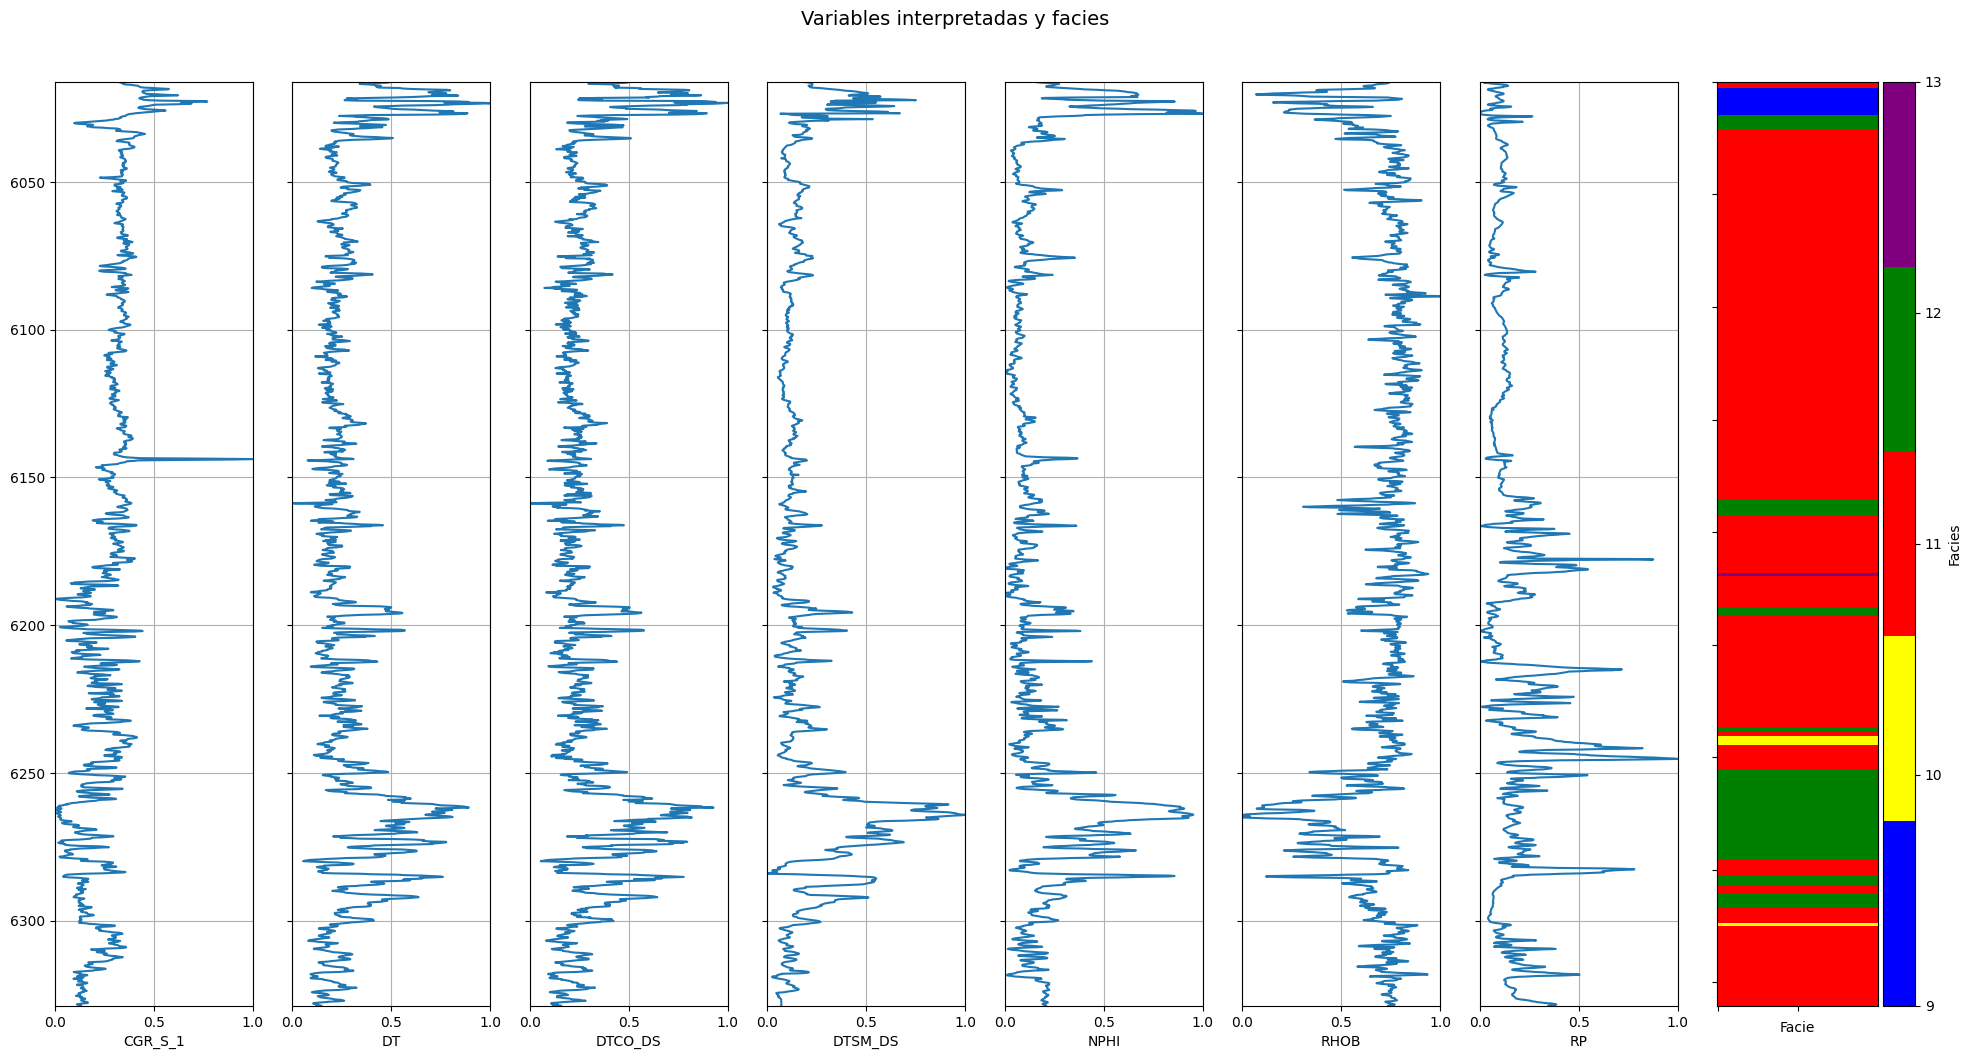

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


def make_faces_log_plot(logs, facies_colors):
    logs = logs.sort_values(by='DEPT')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)],'indexed')
    
    ztop = logs.DEPT.min()
    zbot = logs.DEPT.max()

    facie = np.repeat(np.expand_dims(logs['LITOF'].values,1),100,1)

  
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8 + 2 * 8, 12))
    
    cols = ['CGR_S_1', 'DT', 'DTCO_DS', 'DTSM_DS', 'NPHI', 'RHOB', 'RP']
    for i, col in enumerate(cols):
        if col in logs.columns:
            ax[i].plot(logs[col], logs['DEPT'], '-')
            ax[i].set_xlabel(col)
            ax[i].set_xlim(logs[col].min(), logs[col].max())
            ax[i].set_ylim(ztop, zbot)
            ax[i].invert_yaxis()
            ax[i].grid()
            ax[i].locator_params(axis='x', nbins=3)
            if i > 0:
                ax[i].set_yticklabels([])
    
    def plot_facies(ax, cluster, title):
        unique_clusters = np.unique(cluster)
        cmap_facies = colors.ListedColormap([facies_colors[i-9] for i in unique_clusters], 'indexed')  # Ajuste para colores basados en facies (9-13)
        im = ax.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies, vmin=9, vmax=13)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="20%", pad=0.05)
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label('Facies')
        cbar.set_ticks(np.arange(9, 14))
        cbar.set_ticklabels(np.arange(9, 14))
        ax.set_xlabel(title)
        ax.set_yticklabels([])
        ax.set_xticklabels([])

    plot_facies(ax[7], facie, 'Facie')

    f.suptitle('Variables interpretadas y facies', fontsize=14, y=0.94)
    plt.show()
    
facies_colors = ['blue', 'yellow', 'red', 'green', 'purple']
df_origin['LITOF'] = df_origin['LITOF'].astype(int) 
make_faces_log_plot(df_origin, facies_colors)


C:\Users\adona\AppData\Local\Temp\ipykernel_17828\1072567695.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inter['LITOF'] = df_inter['LITOF'].astype(int)


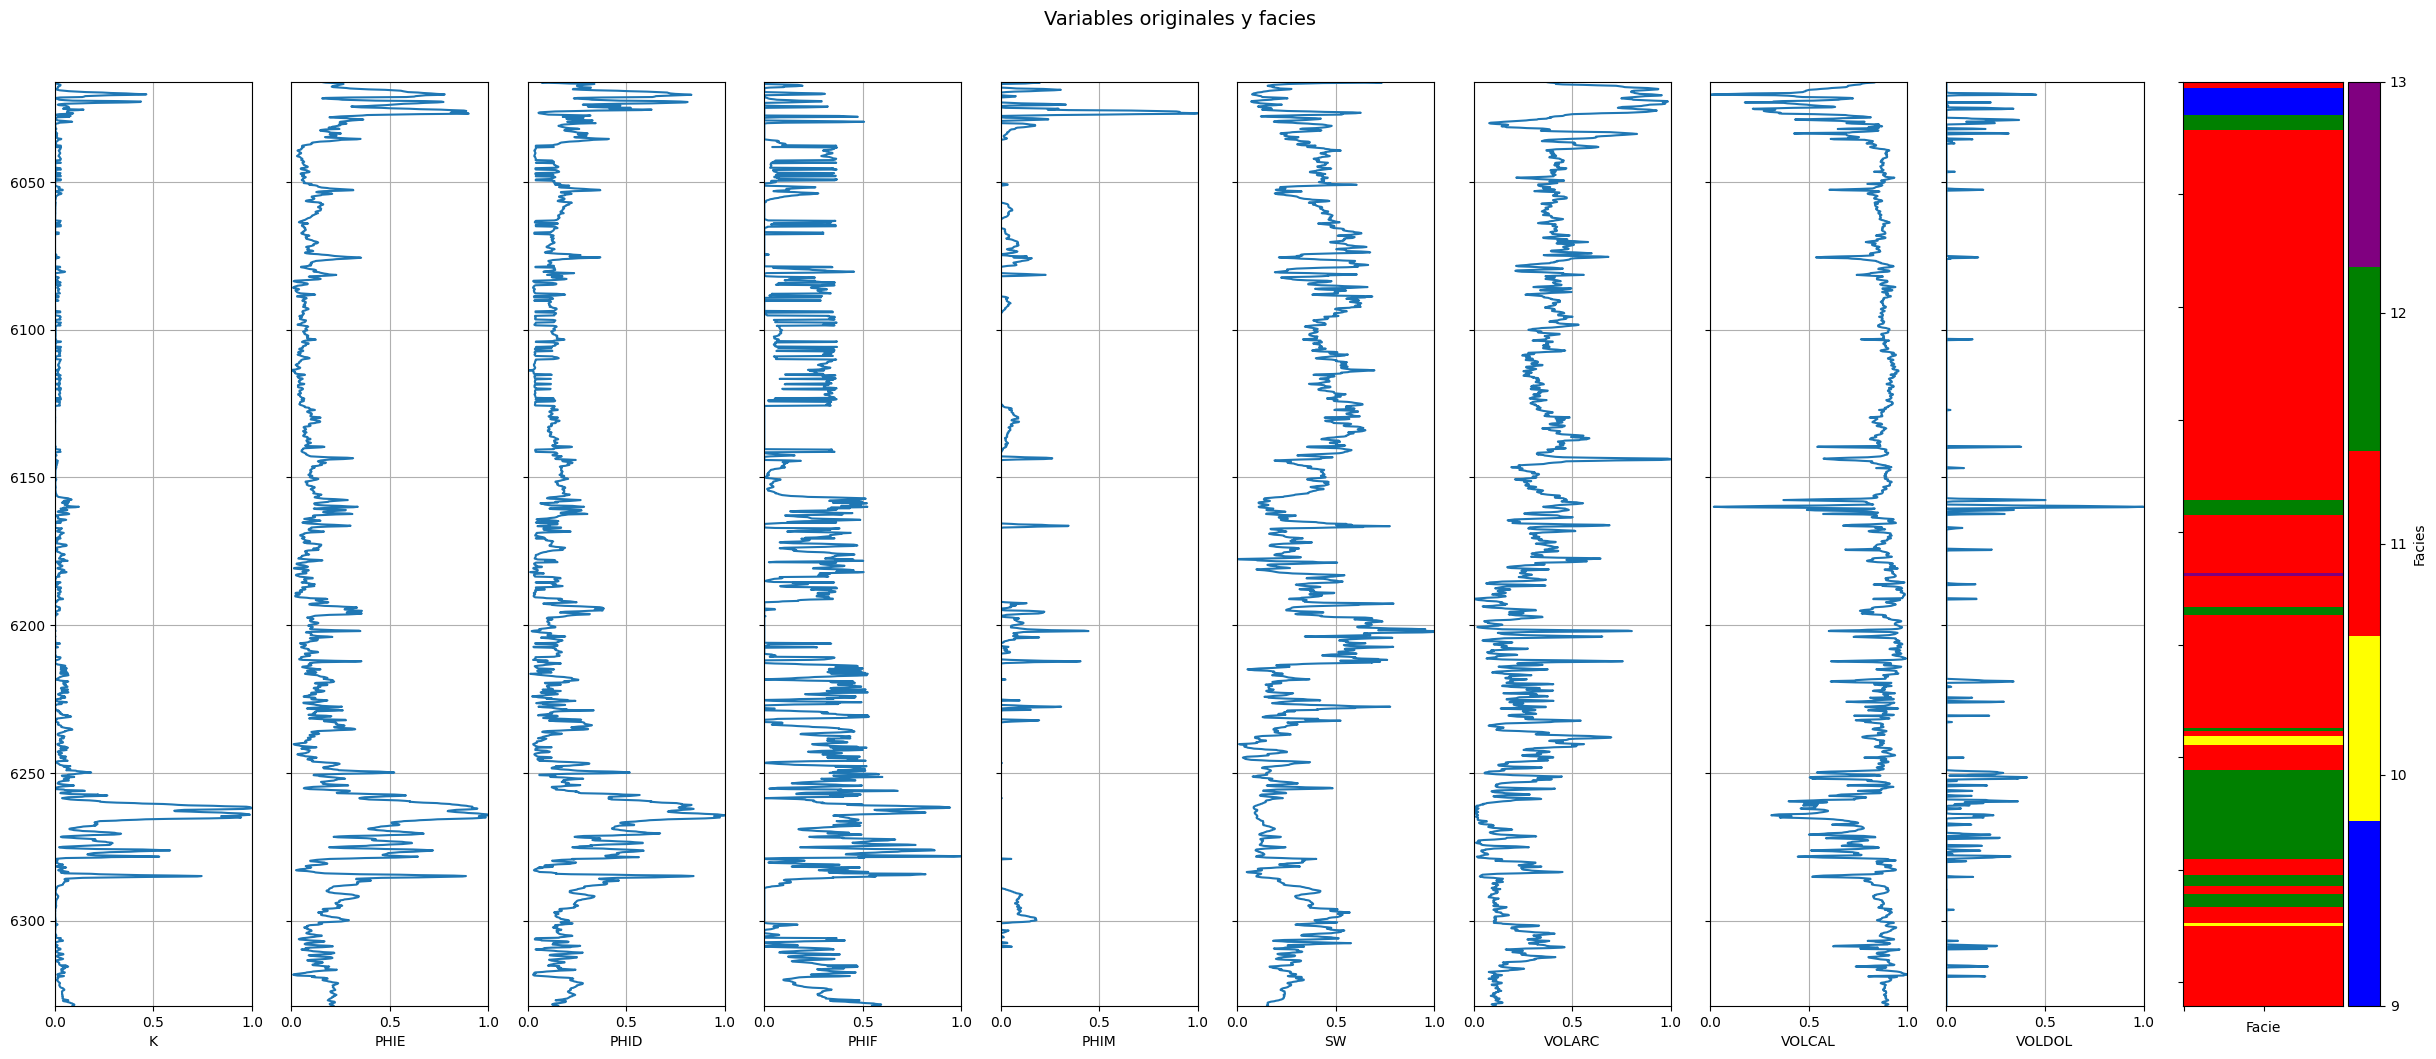

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


def make_faces_log_plot(logs, facies_colors):
    logs = logs.sort_values(by='DEPT')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)],'indexed')
    
    ztop = logs.DEPT.min()
    zbot = logs.DEPT.max()

    facie = np.repeat(np.expand_dims(logs['LITOF'].values,1),100,1)

  
    f, ax = plt.subplots(nrows=1, ncols=10, figsize=(10 + 2 * 10, 12))
    
    cols = ['K','PHIE',	'PHID',	'PHIF',	'PHIM',	'SW',	'VOLARC',	'VOLCAL','VOLDOL']
    for i, col in enumerate(cols):
        if col in logs.columns:
            ax[i].plot(logs[col], logs['DEPT'], '-')
            ax[i].set_xlabel(col)
            ax[i].set_xlim(logs[col].min(), logs[col].max())
            ax[i].set_ylim(ztop, zbot)
            ax[i].invert_yaxis()
            ax[i].grid()
            ax[i].locator_params(axis='x', nbins=3)
            if i > 0:
                ax[i].set_yticklabels([])
    
    def plot_facies(ax, cluster, title):
        unique_clusters = np.unique(cluster)
        cmap_facies = colors.ListedColormap([facies_colors[i-9] for i in unique_clusters], 'indexed')  # Ajuste para colores basados en facies (9-13)
        im = ax.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies, vmin=9, vmax=13)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="20%", pad=0.05)
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label('Facies')
        cbar.set_ticks(np.arange(9, 14))
        cbar.set_ticklabels(np.arange(9, 14))
        ax.set_xlabel(title)
        ax.set_yticklabels([])
        ax.set_xticklabels([])

    plot_facies(ax[9], facie, 'Facie')

    f.suptitle('Variables originales y facies', fontsize=14, y=0.94)
    plt.show()
    
facies_colors = ['blue', 'yellow', 'red', 'green', 'purple']
df_inter['LITOF'] = df_inter['LITOF'].astype(int) 
make_faces_log_plot(df_inter, facies_colors)


In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 

def plot_facies_histograma(df, facies_column):
    facies_counts = df[facies_column].value_counts()
    plt.figure(figsize=(10,6))
    facies_counts.plot(kind='bar')
    plt.xlabel('Facies')
    plt.ylabel('Número de Elementos')
    plt.title('Número de Elementos por Facie')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

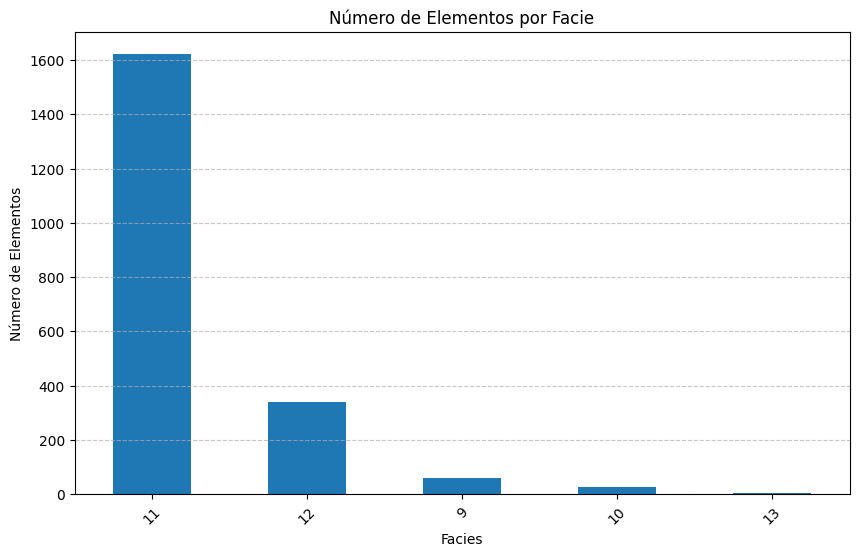

In [14]:
plot_facies_histograma(df_origin,'LITOF')


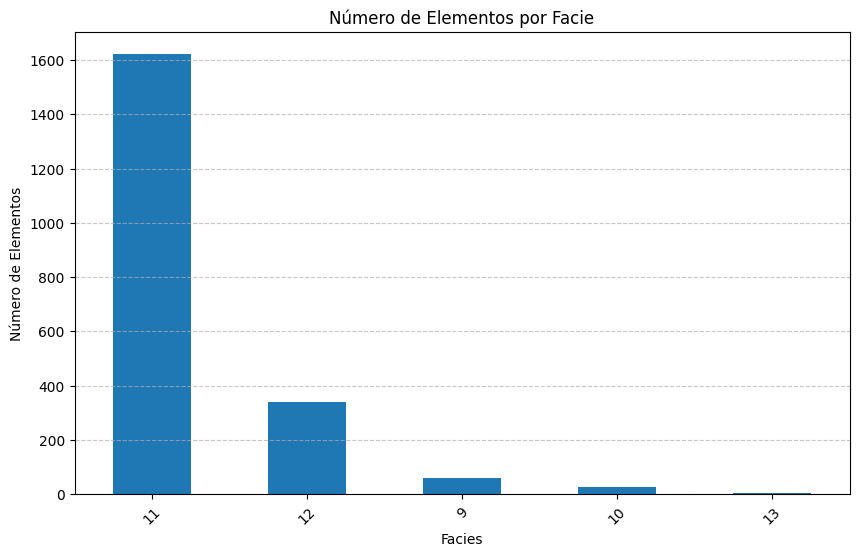

In [15]:
plot_facies_histograma(df_inter,'LITOF')


Histograma con el numero de registros para cada facie

In [16]:
X_train = X_train.drop(columns=['DEPT'])
X_train

,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL
694,0.287933,0.173877,0.177749,0.085018,0.030303,0.802570,0.118865,0.020171,0.034072,0.034103,0.305907,0.000000,0.550951,0.305068,0.928062,0.0
1222,0.274985,0.301113,0.351961,0.191536,0.072727,0.785981,0.025100,0.000000,0.076798,0.048955,0.000000,0.116019,1.000000,0.284600,0.911118,0.0
1578,0.127212,0.276453,0.291754,0.189161,0.250505,0.657009,0.173515,0.058647,0.265549,0.258526,0.348101,0.000000,0.209109,0.107212,0.861474,0.0
618,0.261985,0.167382,0.186323,0.083267,0.046970,0.796495,0.123190,0.028131,0.051920,0.039604,0.354430,0.000000,0.495295,0.264133,0.930737,0.0
1452,0.368928,0.212238,0.213034,0.120551,0.107576,0.777804,0.220385,0.021004,0.098972,0.107261,0.280591,0.000000,0.192793,0.489279,0.836207,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.027674,0.576725,0.620402,0.860155,0.728283,0.295561,0.168344,0.459897,0.741482,0.711771,0.466245,0.000000,0.111912,0.020468,0.625743,0.0
1095,0.282808,0.175379,0.177511,0.080127,0.037374,0.914720,0.153443,0.016373,0.023797,0.031353,0.278481,0.000000,0.498699,0.296296,0.936088,0.0
1130,0.163604,0.160563,0.184444,0.069492,0.032323,0.803505,0.229443,0.023965,0.042726,0.036854,0.329114,0.000000,0.390791,0.143275,0.972354,0.0
1294,0.273047,0.228829,0.234540,0.090085,0.074747,0.729439,0.189374,0.011587,0.087074,0.116062,0.198312,0.000000,0.300501,0.280702,0.906361,0.0


In [17]:
X_test = X_test.drop(columns=['DEPT'])
X_test

,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL
464,0.319427,0.231471,0.225282,0.080840,0.024747,0.834112,0.126384,0.015431,0.021092,0.030253,0.270042,0.000000,0.552853,0.362573,0.917360,0.000000
1052,0.312871,0.166530,0.180368,0.048147,0.064141,0.788318,0.322654,0.037085,0.064900,0.040154,0.402954,0.000000,0.197698,0.349903,0.897741,0.000000
1315,0.176396,0.215607,0.232922,0.140988,0.054040,0.761916,0.384483,0.064304,0.068686,0.012101,0.525316,0.000000,0.231832,0.156920,0.953924,0.000000
710,0.295919,0.191259,0.196792,0.114481,0.058081,0.810047,0.103812,0.001086,0.057328,0.132013,0.023207,0.000000,0.513213,0.318713,0.911118,0.000000
544,0.355398,0.198477,0.194526,0.100812,0.082323,0.734813,0.128844,0.003718,0.085452,0.146315,0.075949,0.000000,0.343443,0.448343,0.856124,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,0.387519,0.126022,0.134456,0.075592,0.022727,0.821963,0.587899,0.012149,0.011357,0.026953,0.242616,0.000000,0.009510,0.560429,0.862663,0.000000
1364,0.319261,0.214714,0.223491,0.076445,0.076263,0.782009,0.314081,0.040815,0.076257,0.047305,0.419831,0.000000,0.186987,0.362573,0.887634,0.000000
67,0.489680,0.788675,0.793878,0.609623,0.894949,0.215421,0.005915,0.066259,0.855598,0.101210,0.000000,0.908127,0.442943,0.878168,0.301724,0.000000
997,0.375453,0.296209,0.286157,0.137089,0.142929,0.842523,0.162008,0.011638,0.118442,0.155116,0.170886,0.000000,0.231832,0.511696,0.818668,0.000000


Random Forest 

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
origin_features_columns=['CGR_S_1', 'DT', 'DTCO_DS', 'DTSM_DS', 'NPHI', 'RHOB', 'RP']

inter_features_columns=['K','PHIE',	'PHID',	'PHIF',	'PHIM',	'SW',	'VOLARC',	'VOLCAL','VOLDOL']

X_train_origin=X_train[origin_features_columns]
X_train_inter=X_train[inter_features_columns]

In [20]:
X_train_origin

,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP
694,0.287933,0.173877,0.177749,0.085018,0.030303,0.802570,0.118865
1222,0.274985,0.301113,0.351961,0.191536,0.072727,0.785981,0.025100
1578,0.127212,0.276453,0.291754,0.189161,0.250505,0.657009,0.173515
618,0.261985,0.167382,0.186323,0.083267,0.046970,0.796495,0.123190
1452,0.368928,0.212238,0.213034,0.120551,0.107576,0.777804,0.220385
...,...,...,...,...,...,...,...
1638,0.027674,0.576725,0.620402,0.860155,0.728283,0.295561,0.168344
1095,0.282808,0.175379,0.177511,0.080127,0.037374,0.914720,0.153443
1130,0.163604,0.160563,0.184444,0.069492,0.032323,0.803505,0.229443
1294,0.273047,0.228829,0.234540,0.090085,0.074747,0.729439,0.189374


In [21]:
X_train_inter

,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL
694,0.020171,0.034072,0.034103,0.305907,0.000000,0.550951,0.305068,0.928062,0.0
1222,0.000000,0.076798,0.048955,0.000000,0.116019,1.000000,0.284600,0.911118,0.0
1578,0.058647,0.265549,0.258526,0.348101,0.000000,0.209109,0.107212,0.861474,0.0
618,0.028131,0.051920,0.039604,0.354430,0.000000,0.495295,0.264133,0.930737,0.0
1452,0.021004,0.098972,0.107261,0.280591,0.000000,0.192793,0.489279,0.836207,0.0
...,...,...,...,...,...,...,...,...,...
1638,0.459897,0.741482,0.711771,0.466245,0.000000,0.111912,0.020468,0.625743,0.0
1095,0.016373,0.023797,0.031353,0.278481,0.000000,0.498699,0.296296,0.936088,0.0
1130,0.023965,0.042726,0.036854,0.329114,0.000000,0.390791,0.143275,0.972354,0.0
1294,0.011587,0.087074,0.116062,0.198312,0.000000,0.300501,0.280702,0.906361,0.0


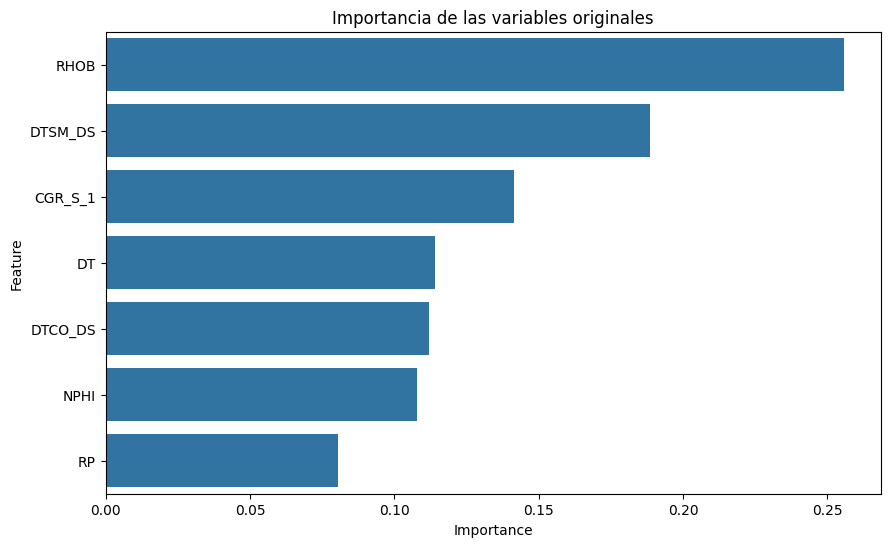

In [22]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_origin, y_train)

importance = rf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train_origin.columns,
    'Importance': importance
}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las variables originales')
plt.show()

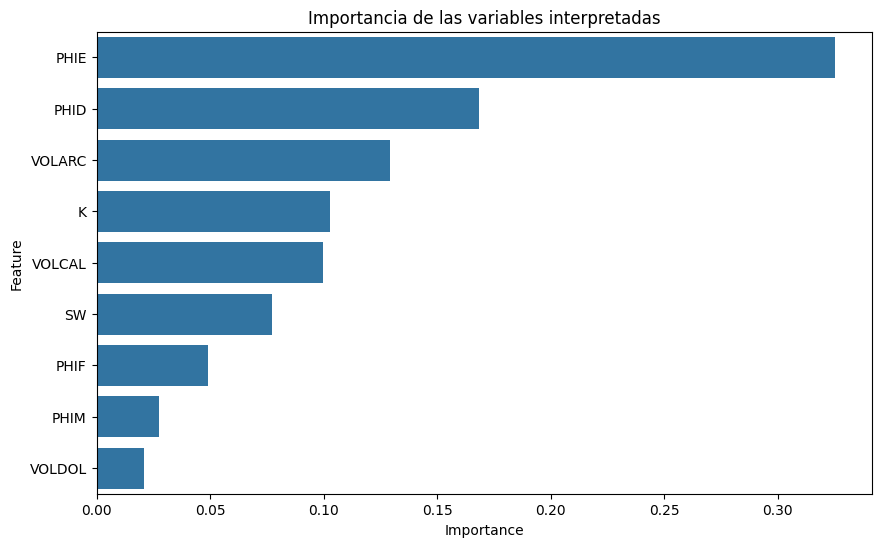

In [23]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_inter, y_train)

importance = rf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train_inter.columns,
    'Importance': importance
}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las variables interpretadas')
plt.show()

2. Desarrollo de clasificadores

validacion cruzada, validar que split si ocupa validacion cruzada 


## Network Neural Multi-Layer Perceptron 
### Input layer
First layer of the MLP, receive the input data. Each neuron in  the input layer represents a feature in the input data. 
### Hidden layer 
An MLP can have one or more hidden layers, and each hidden layer consists of multiple neurons. , they perform computations and transformations in the input data using weights, biases and activation  functions. 
### Output layer
The number of neurons in the output layer depends on the task at hand. In a classification task, the output layer might have one neuron per class.
### Weight and Biases
Connections between neurons in adjacent layer are weighted. These weights and biases are the parameters that the network learns during training. 
### Activation function 
There are mathematical functions applied to the output of each neuron to introduce non-linearity into the model. Common activation functions include the sigmoid, tanh, and ReLU. 


In [24]:
df_train = X_train_origin
df_train


,CGR_S_1,DT,DTCO_DS,DTSM_DS,NPHI,RHOB,RP
694,0.287933,0.173877,0.177749,0.085018,0.030303,0.802570,0.118865
1222,0.274985,0.301113,0.351961,0.191536,0.072727,0.785981,0.025100
1578,0.127212,0.276453,0.291754,0.189161,0.250505,0.657009,0.173515
618,0.261985,0.167382,0.186323,0.083267,0.046970,0.796495,0.123190
1452,0.368928,0.212238,0.213034,0.120551,0.107576,0.777804,0.220385
...,...,...,...,...,...,...,...
1638,0.027674,0.576725,0.620402,0.860155,0.728283,0.295561,0.168344
1095,0.282808,0.175379,0.177511,0.080127,0.037374,0.914720,0.153443
1130,0.163604,0.160563,0.184444,0.069492,0.032323,0.803505,0.229443
1294,0.273047,0.228829,0.234540,0.090085,0.074747,0.729439,0.189374


In [25]:
df_facies = y_train
df_facies

694     11
1222    11
1578    12
618     11
1452    11
        ..
1638    12
1095    13
1130    11
1294    11
860     11
Name: LITOF, Length: 1642, dtype: int64

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [27]:
X = df_train.values
y = df_facies.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)




Funcion para encontrar la mejor combinacion de  hyperparametros para MLP model

In [28]:
mlp = MLPClassifier(max_iter=500, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
    'activation': ['tanh', 'relu'], 
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001], 
    'learning_rate': ['constant', 'adaptive'],
}



Valores más pequeños: el modelo se ajusta más a los datos de entrenamiento.


Valores más grandes: evita el overffing, puedo no capturar bien la variación en los datos de entrenamiento. 

In [29]:
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


En hidden layer, hay dos capaz con 100 y 50 neuronas respectivamente. 

### Matriz de confusion variables originales sin SMOTE

In [30]:
best_mlp = grid_search.best_estimator_

accuracy= best_mlp.score(X_val, y_val)

print(f"Precision de validacion del mejor modelo: {accuracy:.2f}")
y_pred = best_mlp.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Precision de validacion del mejor modelo: 0.95
[[ 10   0   0   0   0]
 [  0   2   4   0   0]
 [  1   0 373   8   0]
 [  0   0  10  84   0]
 [  0   0   1   0   0]]
              precision    recall  f1-score   support

           9       0.91      1.00      0.95        10
          10       1.00      0.33      0.50         6
          11       0.96      0.98      0.97       382
          12       0.91      0.89      0.90        94
          13       0.00      0.00      0.00         1

    accuracy                           0.95       493
   macro avg       0.76      0.64      0.66       493
weighted avg       0.95      0.95      0.95       493



C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [36]:
from sklearn import metrics
import pandas as pd
y_pred = best_mlp.predict(X_val)
y_probs = best_mlp.predict_proba(X_val)
tree_roc_auc = metrics.roc_auc_score(y_val, y_probs, multi_class='ovr')
print("ROC AUC:", tree_roc_auc)

tree_precision = metrics.precision_score(y_val, y_pred, average='weighted')
tree_recall = metrics.recall_score(y_val, y_pred, average='weighted')
tree_f1 = metrics.f1_score(y_val, y_pred, average='weighted')

print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1)

tree_confus_matrix = metrics.confusion_matrix(y_val, y_pred)
print("Matriz de Confusión:")
print(tree_confus_matrix)

ROC AUC: 0.9405872809046872
Precision: 0.9495922004266074
Recall: 0.9513184584178499
F1 Score: 0.9483175290542954
Matriz de Confusión:
[[ 10   0   0   0   0]
 [  0   2   4   0   0]
 [  1   0 373   8   0]
 [  0   0  10  84   0]
 [  0   0   1   0   0]]


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision, son establecidas en esa categoria y si pertenecen a esa. 

F1-score, buen balance entre precision y recall.  


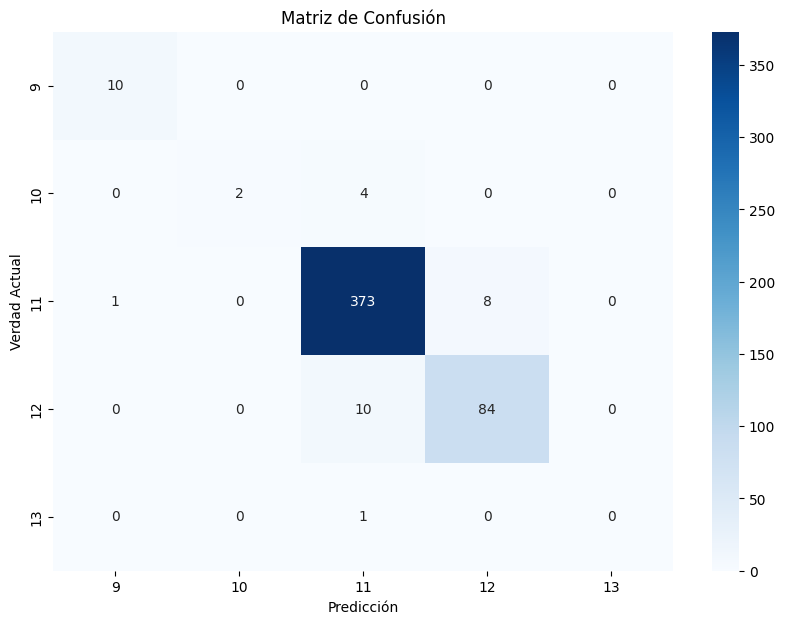

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred= best_mlp.predict(X_val)
cm= confusion_matrix(y_val,y_pred)
labels = ['9', '10', '11','12', '13'] 
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Verdad Actual')
plt.title('Matriz de Confusión')
plt.show()


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(max_iter=300, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(mlp, X, y, cv=kf, scoring='accuracy')

print(f"Validación cruzada: {scores}")
print(f"Precisión media: {np.mean(scores):.2f}")
print(f"Desviación estándar de precisión: {np.std(scores):.2f}")


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adona\A

Validación cruzada: [0.92705167 0.91793313 0.92073171 0.94512195 0.95426829]
Precisión media: 0.93
Desviación estándar de precisión: 0.01


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Variables interpretadas 

In [39]:
df_train_inter = X_train_inter
df_train_inter


,K,PHIE,PHID,PHIF,PHIM,SW,VOLARC,VOLCAL,VOLDOL
694,0.020171,0.034072,0.034103,0.305907,0.000000,0.550951,0.305068,0.928062,0.0
1222,0.000000,0.076798,0.048955,0.000000,0.116019,1.000000,0.284600,0.911118,0.0
1578,0.058647,0.265549,0.258526,0.348101,0.000000,0.209109,0.107212,0.861474,0.0
618,0.028131,0.051920,0.039604,0.354430,0.000000,0.495295,0.264133,0.930737,0.0
1452,0.021004,0.098972,0.107261,0.280591,0.000000,0.192793,0.489279,0.836207,0.0
...,...,...,...,...,...,...,...,...,...
1638,0.459897,0.741482,0.711771,0.466245,0.000000,0.111912,0.020468,0.625743,0.0
1095,0.016373,0.023797,0.031353,0.278481,0.000000,0.498699,0.296296,0.936088,0.0
1130,0.023965,0.042726,0.036854,0.329114,0.000000,0.390791,0.143275,0.972354,0.0
1294,0.011587,0.087074,0.116062,0.198312,0.000000,0.300501,0.280702,0.906361,0.0


In [40]:
df_facies

694     11
1222    11
1578    12
618     11
1452    11
        ..
1638    12
1095    13
1130    11
1294    11
860     11
Name: LITOF, Length: 1642, dtype: int64

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [42]:
X = df_train_inter.values
y= df_facies.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
mlp = MLPClassifier(max_iter=500, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
    'activation': ['tanh', 'relu'], 
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001], 
    'learning_rate': ['constant', 'adaptive'],
}



In [44]:
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Matriz de confusion variables interpretadas sin SMOTE

In [45]:
best_mlp = grid_search.best_estimator_

accuracy= best_mlp.score(X_val, y_val)

print(f"Precision de validacion del mejor modelo: {accuracy:.2f}")
y_pred = best_mlp.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Precision de validacion del mejor modelo: 0.93
[[ 10   0   0   0   0]
 [  0   1   5   0   0]
 [  2   1 370   9   0]
 [  0   0  16  78   0]
 [  0   0   1   0   0]]
              precision    recall  f1-score   support

           9       0.83      1.00      0.91        10
          10       0.50      0.17      0.25         6
          11       0.94      0.97      0.96       382
          12       0.90      0.83      0.86        94
          13       0.00      0.00      0.00         1

    accuracy                           0.93       493
   macro avg       0.63      0.59      0.60       493
weighted avg       0.93      0.93      0.93       493



C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [46]:
from sklearn import metrics
import pandas as pd
y_pred = best_mlp.predict(X_val)
y_probs = best_mlp.predict_proba(X_val)
tree_roc_auc = metrics.roc_auc_score(y_val, y_probs, multi_class='ovr')
print("ROC AUC:", tree_roc_auc)

tree_precision = metrics.precision_score(y_val, y_pred, average='weighted')
tree_recall = metrics.recall_score(y_val, y_pred, average='weighted')
tree_f1 = metrics.f1_score(y_val, y_pred, average='weighted')

print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1)

tree_confus_matrix = metrics.confusion_matrix(y_val, y_pred)
print("Matriz de Confusión:")
print(tree_confus_matrix)

ROC AUC: 0.9181403489824392
Precision: 0.9252949693551618
Recall: 0.9310344827586207
F1 Score: 0.9266270221489624
Matriz de Confusión:
[[ 10   0   0   0   0]
 [  0   1   5   0   0]
 [  2   1 370   9   0]
 [  0   0  16  78   0]
 [  0   0   1   0   0]]


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


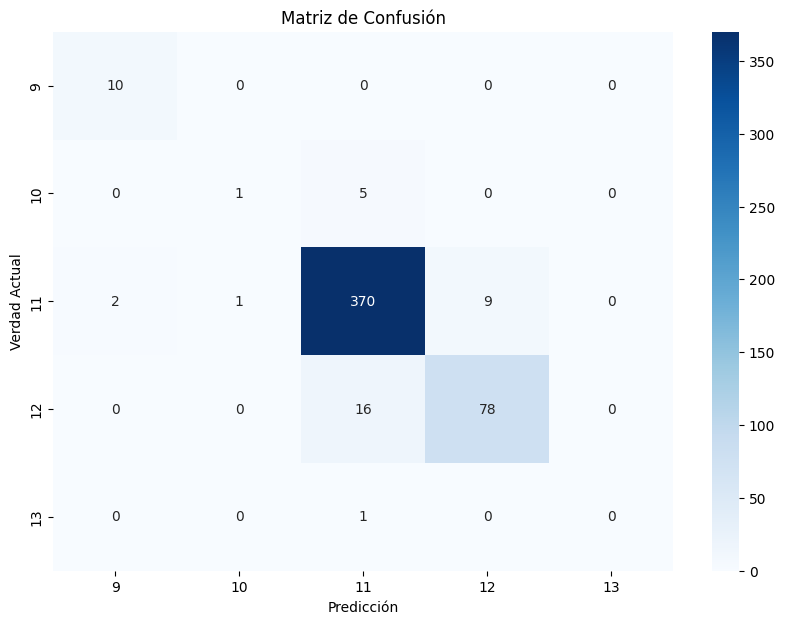

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred= best_mlp.predict(X_val)
cm= confusion_matrix(y_val,y_pred)
labels = ['9', '10', '11','12', '13']  
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Verdad Actual')
plt.title('Matriz de Confusión')
plt.show()


In [48]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(max_iter=300, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(mlp, X, y, cv=kf, scoring='accuracy')

print(f"Validación cruzada: {scores}")
print(f"Precisión media: {np.mean(scores):.2f}")
print(f"Desviación estándar de precisión: {np.std(scores):.2f}")

C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adona\A

Validación cruzada: [0.90273556 0.93617021 0.92987805 0.92682927 0.93597561]
Precisión media: 0.93
Desviación estándar de precisión: 0.01


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Tecnica de sobremuestreo de minorias sinteticas (SMOTE)para muestras desvalanceadas 

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [50]:
X = df_train_inter.values
y= df_facies.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
print("Distribucion de clases pre SMOTE:",Counter(y_train))

Distribucion de clases pre SMOTE: Counter({11: 920, 12: 179, 9: 33, 10: 12, 13: 5})


In [52]:
smote = SMOTE(k_neighbors=3,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Distribución de clases después de SMOTE:", Counter(y_resampled))


Distribución de clases después de SMOTE: Counter({12: 920, 11: 920, 10: 920, 9: 920, 13: 920})


In [53]:
mlp = MLPClassifier(max_iter=500, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
    'activation': ['tanh', 'relu'], 
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001], 
    'learning_rate': ['constant', 'adaptive'],
}



In [54]:
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3)


grid_search.fit(X_resampled, y_resampled)


print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Matriz de confusion variables interpretadas con SMOTE

In [55]:
best_mlp = grid_search.best_estimator_

accuracy= best_mlp.score(X_val, y_val)

print(f"Precision de validacion del mejor modelo: {accuracy:.2f}")
y_pred = best_mlp.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Precision de validacion del mejor modelo: 0.91
[[ 10   0   0   0   0]
 [  0   3   3   0   0]
 [  3   6 349  23   1]
 [  0   0   7  87   0]
 [  0   0   1   0   0]]
              precision    recall  f1-score   support

           9       0.77      1.00      0.87        10
          10       0.33      0.50      0.40         6
          11       0.97      0.91      0.94       382
          12       0.79      0.93      0.85        94
          13       0.00      0.00      0.00         1

    accuracy                           0.91       493
   macro avg       0.57      0.67      0.61       493
weighted avg       0.92      0.91      0.91       493



In [56]:
from sklearn import metrics
import pandas as pd
y_pred = best_mlp.predict(X_val)
y_probs = best_mlp.predict_proba(X_val)
tree_roc_auc = metrics.roc_auc_score(y_val, y_probs, multi_class='ovr')
print("ROC AUC:", tree_roc_auc)

tree_precision = metrics.precision_score(y_val, y_pred, average='weighted')
tree_recall = metrics.recall_score(y_val, y_pred, average='weighted')
tree_f1 = metrics.f1_score(y_val, y_pred, average='weighted')

print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1)

tree_confus_matrix = metrics.confusion_matrix(y_val, y_pred)
print("Matriz de Confusión:")
print(tree_confus_matrix)

ROC AUC: 0.9551396797602709
Precision: 0.9216339554067748
Recall: 0.9107505070993914
F1 Score: 0.91403616968971
Matriz de Confusión:
[[ 10   0   0   0   0]
 [  0   3   3   0   0]
 [  3   6 349  23   1]
 [  0   0   7  87   0]
 [  0   0   1   0   0]]


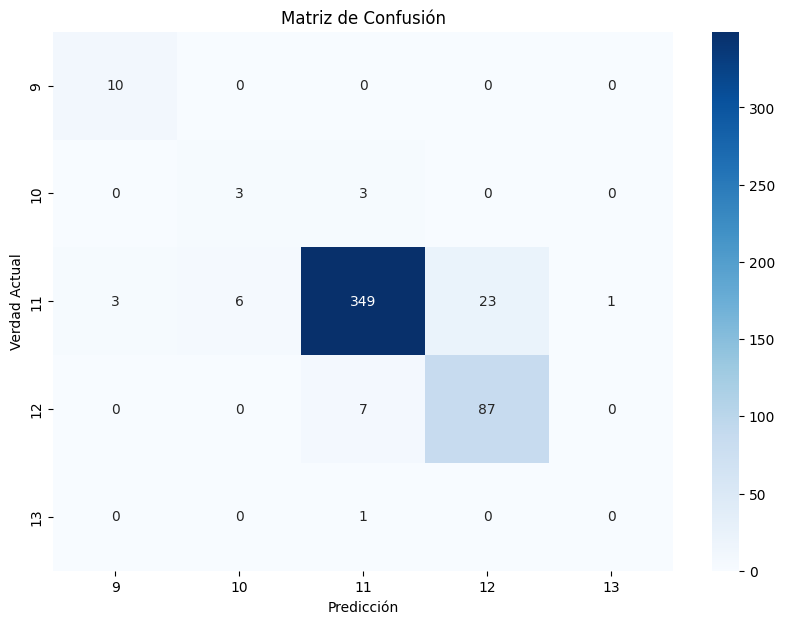

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred= best_mlp.predict(X_val)
cm= confusion_matrix(y_val,y_pred)
labels = ['9', '10', '11','12', '13']  

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Verdad Actual')
plt.title('Matriz de Confusión')
plt.show()


Tecnica de sobremuestreo de minorias sinteticas (SMOTE)para muestras desvalanceadas 

In [58]:
X = df_train.values
y = df_facies.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)



In [59]:
print("Distribucion de clases pre SMOTE:",Counter(y_train))

Distribucion de clases pre SMOTE: Counter({11: 920, 12: 179, 9: 33, 10: 12, 13: 5})


In [60]:
smote = SMOTE(k_neighbors=3,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Distribución de clases después de SMOTE:", Counter(y_resampled))


Distribución de clases después de SMOTE: Counter({12: 920, 11: 920, 10: 920, 9: 920, 13: 920})


In [61]:
mlp = MLPClassifier(max_iter=500, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
    'activation': ['tanh', 'relu'], 
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001], 
    'learning_rate': ['constant', 'adaptive'],
}



In [62]:
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3)


grid_search.fit(X_resampled, y_resampled)


print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Matriz de confusion variables originales con SMOTE

In [63]:
best_mlp = grid_search.best_estimator_

accuracy= best_mlp.score(X_val, y_val)

print(f"Precision de validacion del mejor modelo: {accuracy:.2f}")
y_pred = best_mlp.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Precision de validacion del mejor modelo: 0.96
[[ 10   0   0   0   0]
 [  0   4   2   0   0]
 [  2   4 366  10   0]
 [  0   0   2  92   0]
 [  0   0   1   0   0]]
              precision    recall  f1-score   support

           9       0.83      1.00      0.91        10
          10       0.50      0.67      0.57         6
          11       0.99      0.96      0.97       382
          12       0.90      0.98      0.94        94
          13       0.00      0.00      0.00         1

    accuracy                           0.96       493
   macro avg       0.64      0.72      0.68       493
weighted avg       0.96      0.96      0.96       493



C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [64]:
from sklearn import metrics
import pandas as pd
y_pred = best_mlp.predict(X_val)
y_probs = best_mlp.predict_proba(X_val)
tree_roc_auc = metrics.roc_auc_score(y_val, y_probs, multi_class='ovr')
print("ROC AUC:", tree_roc_auc)

tree_precision = metrics.precision_score(y_val, y_pred, average='weighted')
tree_recall = metrics.recall_score(y_val, y_pred, average='weighted')
tree_f1 = metrics.f1_score(y_val, y_pred, average='weighted')

print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1)

tree_confus_matrix = metrics.confusion_matrix(y_val, y_pred)
print("Matriz de Confusión:")
print(tree_confus_matrix)

ROC AUC: 0.944435363465337
Precision: 0.9593699778506833
Recall: 0.9574036511156186
F1 Score: 0.9576287870679127
Matriz de Confusión:
[[ 10   0   0   0   0]
 [  0   4   2   0   0]
 [  2   4 366  10   0]
 [  0   0   2  92   0]
 [  0   0   1   0   0]]


C:\Users\adona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


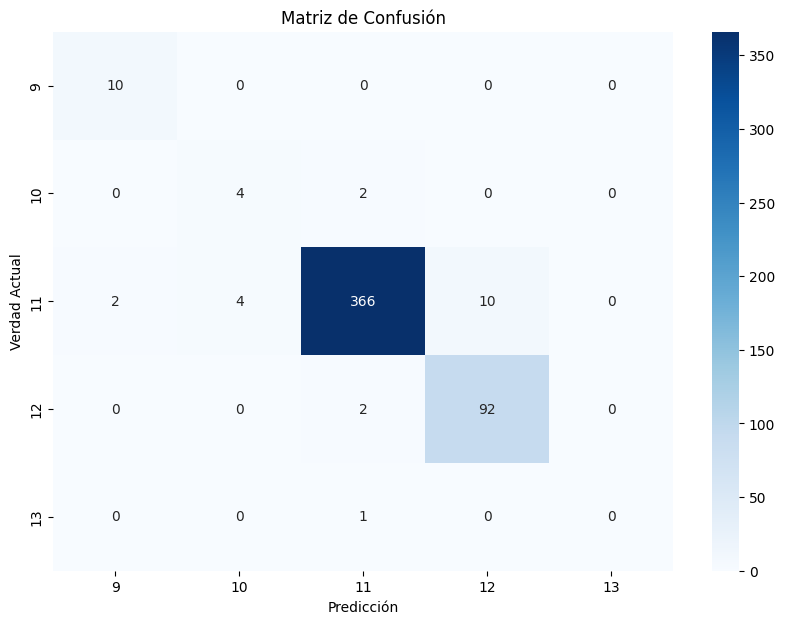

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred= best_mlp.predict(X_val)
cm= confusion_matrix(y_val,y_pred)
labels = ['9', '10', '11','12', '13']  
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Verdad Actual')
plt.title('Matriz de Confusión')
plt.show()
